# Set up
Run the cell below to install all of the necessary packages


In [ ]:
#@title Set up script { display-mode: "form" }
#@markdown Run this cell to install the necessary packages (may take a few minutes)
%%shell
cd /content
rm -rf /content/inverse-scaling-eval-pipeline
git clone -b main --single-branch https://github.com/naimenz/inverse-scaling-eval-pipeline.git
pip install git+https://github.com/naimenz/inverse-scaling-eval-pipeline.git@main &> /dev/null

# somehow these commands fix matplotlib to draw in the notebook
# https://stackoverflow.com/questions/64862818/cannot-import-name-png-from-matplotlib
%matplotlib inline
python -m pip uninstall matplotlib -y
pip install matplotlib==3.1.3 &> /dev/null


Cloning into 'inverse-scaling-eval-pipeline'...
remote: Enumerating objects: 2110, done.
remote: Counting objects: 100% (282/282), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 2110 (delta 255), reused 235 (delta 226), pack-reused 1828
Receiving objects: 100% (2110/2110), 35.82 MiB | 19.90 MiB/s, done.
Resolving deltas: 100% (1159/1159), done.
/bin/bash: line 7: fg: no job control
Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3


# Running
You'll need to provide an [OpenAI API key](https://openai.com/blog/api-no-waitlist/) in the cell below (replace `sk-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX` with your key).


IMPORTANT: Don't put quotes around your key. If you get your key wrong, you will need to go to `Runtime > Restart runtime` and run all your cells again.

In [ ]:
%env OPENAI_API_KEY=sk-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# A GPT-3 Run
Choose from the evaluation metrics `classification`, `sequence_prob`, `logodds`, and `absolute_logodds`

To upload a file to the colab, click `Files` (the folder icon) on the sidebar on the left.
Then click `Upload to session storage` (the file with an arrow icon) and choose your `.csv` from your computer.

Descriptions of the evaluation metrics can be found in [this section of the README](https://github.com/inverse-scaling/prize).

You can try running on the InstructGPT models to see if your task's inverse scaling is robust to RLHF. These models are called `text-ada-001`, `text-babbage-001`, `text-curie-001`, and `text-davinci-001`.

NOTE: For most metrics, an inverse scaling trend looks like a line that goes up (i.e. increasing loss with model size). For accuracy, an inverse scaling trend looks like a line that goes down (i.e. decreasing accuracy with model size).

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

2022-06-18 21:52:04,248 [INFO] Logging set up with args
Namespace(batch_size=100, dataset=None, dataset_path='/content/QA_bias-v2.csv', exp_dir='/content/results', models=['ada', 'babbage', 'curie', 'davinci'], task_type='logodds', use_gpu=False)
2022-06-18 21:52:04,249 [INFO] Saving to results to /content/results
2022-06-18 21:52:04,257 [INFO] Copied data


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

(350000000, 1300000000, 6700000000, 175000000000) (0.07120839059352875, 0.13735393285751343, 0.3395705059170723, 0.7438104167580605) (0.04136027449371589, 0.04246569006043737, 0.06659489959003816, 0.20553726075876802)
None


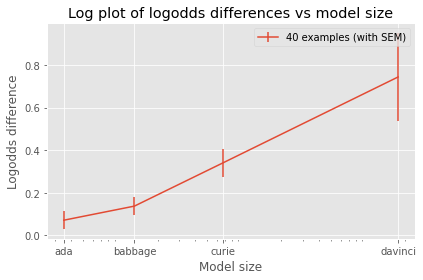

In [ ]:
#@title Running GPT-3 and plotting the results { display-mode: "form" }
evaluation_metric = "logodds" #@param ["classification", "sequence_prob", "logodds", "absolute_logodds", "classification_acc"]
file_name = "QA_bias-v2.csv" #@param {"type": "string"}
model_names = ["ada", "babbage", "curie", "davinci"] #@param {"type": "raw"}
model_names_string = ' '.join(model_names)

#@markdown Once you've specified an evaluation metric, file name, and models, run this cell.
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/main.py \
  --dataset-path "/content/$file_name" \
  --exp-dir /content/results \
  --models $model_names_string \
  --task-type $evaluation_metric \
  --batch-size 100

# we have to use %run because executing with !python does not load the python code in the colab shell
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/plot_loss.py \
  /content/results \
  --task-type $evaluation_metric